In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [68]:
ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

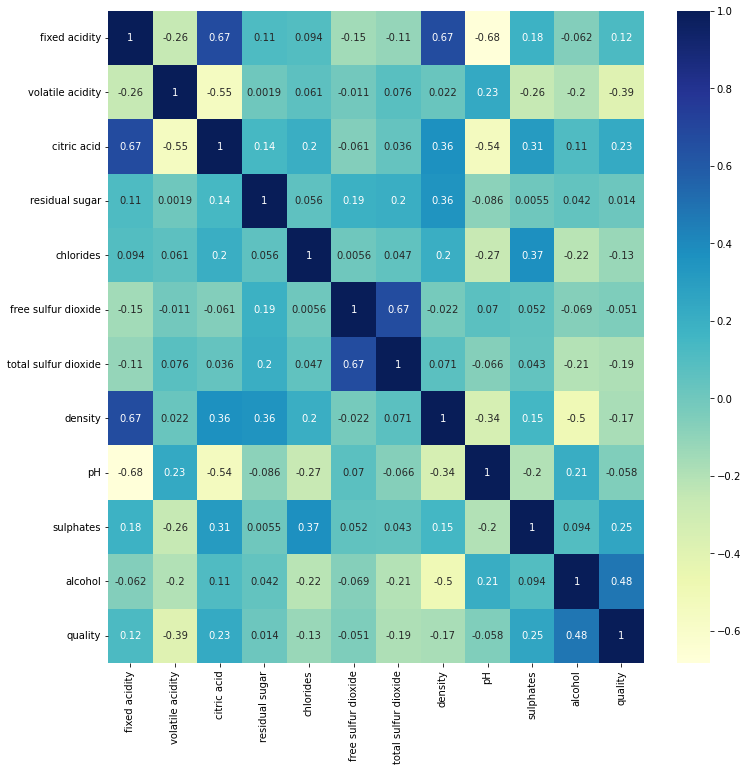

In [6]:
fig = plt.figure()
fig.set_size_inches(12,12)
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True)

In [7]:
X = df.drop(columns=['quality'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
Y = df[['quality']]
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=150)

In [10]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
139,7.8,0.56,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5
876,7.1,0.47,0.00,2.2,0.067,7.0,14.0,0.99517,3.40,0.58,10.9
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
1328,6.5,0.52,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3
138,7.8,0.56,0.19,2.1,0.081,15.0,105.0,0.99620,3.33,0.54,9.5


In [11]:
y_train.head()

,quality
139,5
876,4
363,5
1328,5
138,5


In [12]:
mod = DecisionTreeClassifier()
mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
# on the training dataset
mod.score(x_train, y_train) # kinda overfitting on the training datset

1.0

In [14]:
# on the test dataset
mod.score(x_test, y_test)

0.6625

### trying w removing the duplicate records: 

In [15]:
df1 = df.drop_duplicates()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
X1 = df1.drop(columns=['quality'])
Y1 = df1[['quality']]

In [17]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.4, random_state=500)
mod1 = DecisionTreeClassifier()
mod1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [18]:
mod1.score(x1_test, y1_test)

# the accuracy decreased even more after dropping the duplicate records

0.49264705882352944

### Implementing the criteria = `entropy`

In [19]:
mod2 = DecisionTreeClassifier(criterion='entropy')
mod2.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
mod2.score(x1_test, y1_test)

# decreased even more

0.49080882352941174

In [21]:
dotFile = open('dtree_meta.dot', 'w')
tree.export_graphviz(mod2, dotFile, feature_names=X1.columns)    

## # Visualizing the Decision Tree:

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.4526542467948718, 0.975, 'X[10] <= 10.35\nentropy = 1.718\nsamples = 815\nvalue = [7, 32, 359, 315, 94, 8]'),
 Text(0.1818309294871795, 0.925, 'X[1] <= 0.335\nentropy = 1.338\nsamples = 446\nvalue = [6, 16, 281, 132, 10, 1]'),
 Text(0.04358974358974359, 0.875, 'X[4] <= 0.097\nentropy = 1.498\nsamples = 42\nvalue = [0, 1, 7, 27, 6, 1]'),
 Text(0.03076923076923077, 0.825, 'X[9] <= 0.51\nentropy = 1.297\nsamples = 37\nvalue = [0, 1, 3, 27, 5, 1]'),
 Text(0.020512820512820513, 0.775, 'X[10] <= 9.35\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2, 0, 0, 0]'),
 Text(0.015384615384615385, 0.725, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.02564102564102564, 0.725, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.041025641025641026, 0.775, 'X[3] <= 14.45\nentropy = 0.97\nsamples = 34\nvalue = [0, 0, 1, 27, 5, 1]'),
 Text(0.035897435897435895, 0.725, 'X[4] <= 0.076\nentropy = 0.802\nsamples = 33\nvalue = [0, 0, 0, 27, 5, 1]'),
 Text(0.03076923076

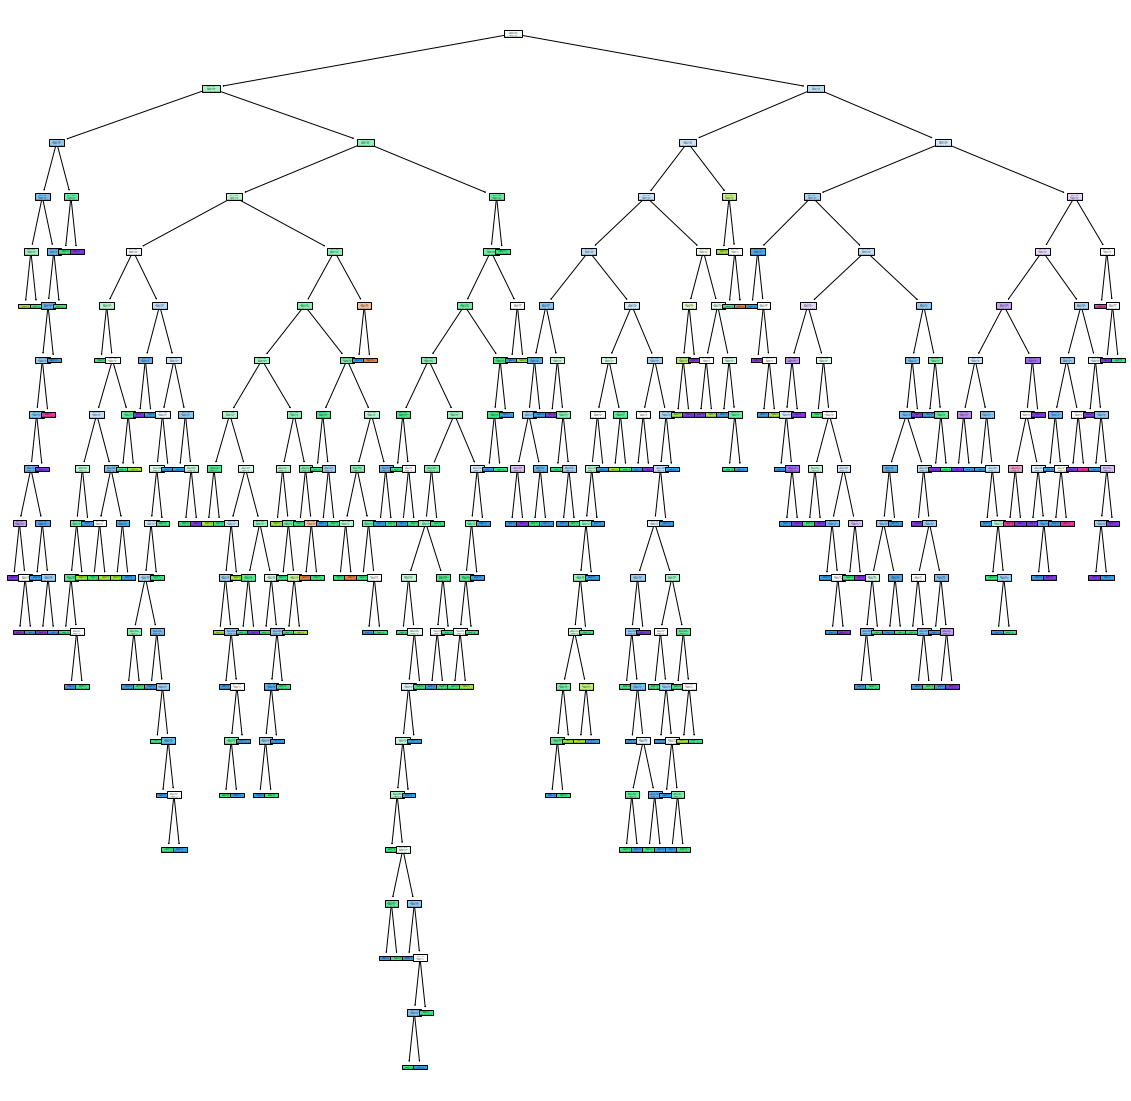

In [23]:
plt.figure(figsize=(20, 20))
tree.plot_tree(mod2, filled=True)

In [24]:
dt1 = df.head(30)
dt1.head()

x1 = dt1.drop(columns=['quality'])
y1 = dt1['quality']

In [25]:
x1.head()
y1.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [26]:
mod_dt1 = DecisionTreeClassifier(criterion='entropy')
mod_dt1.fit(x1, y1)

DecisionTreeClassifier(criterion='entropy')

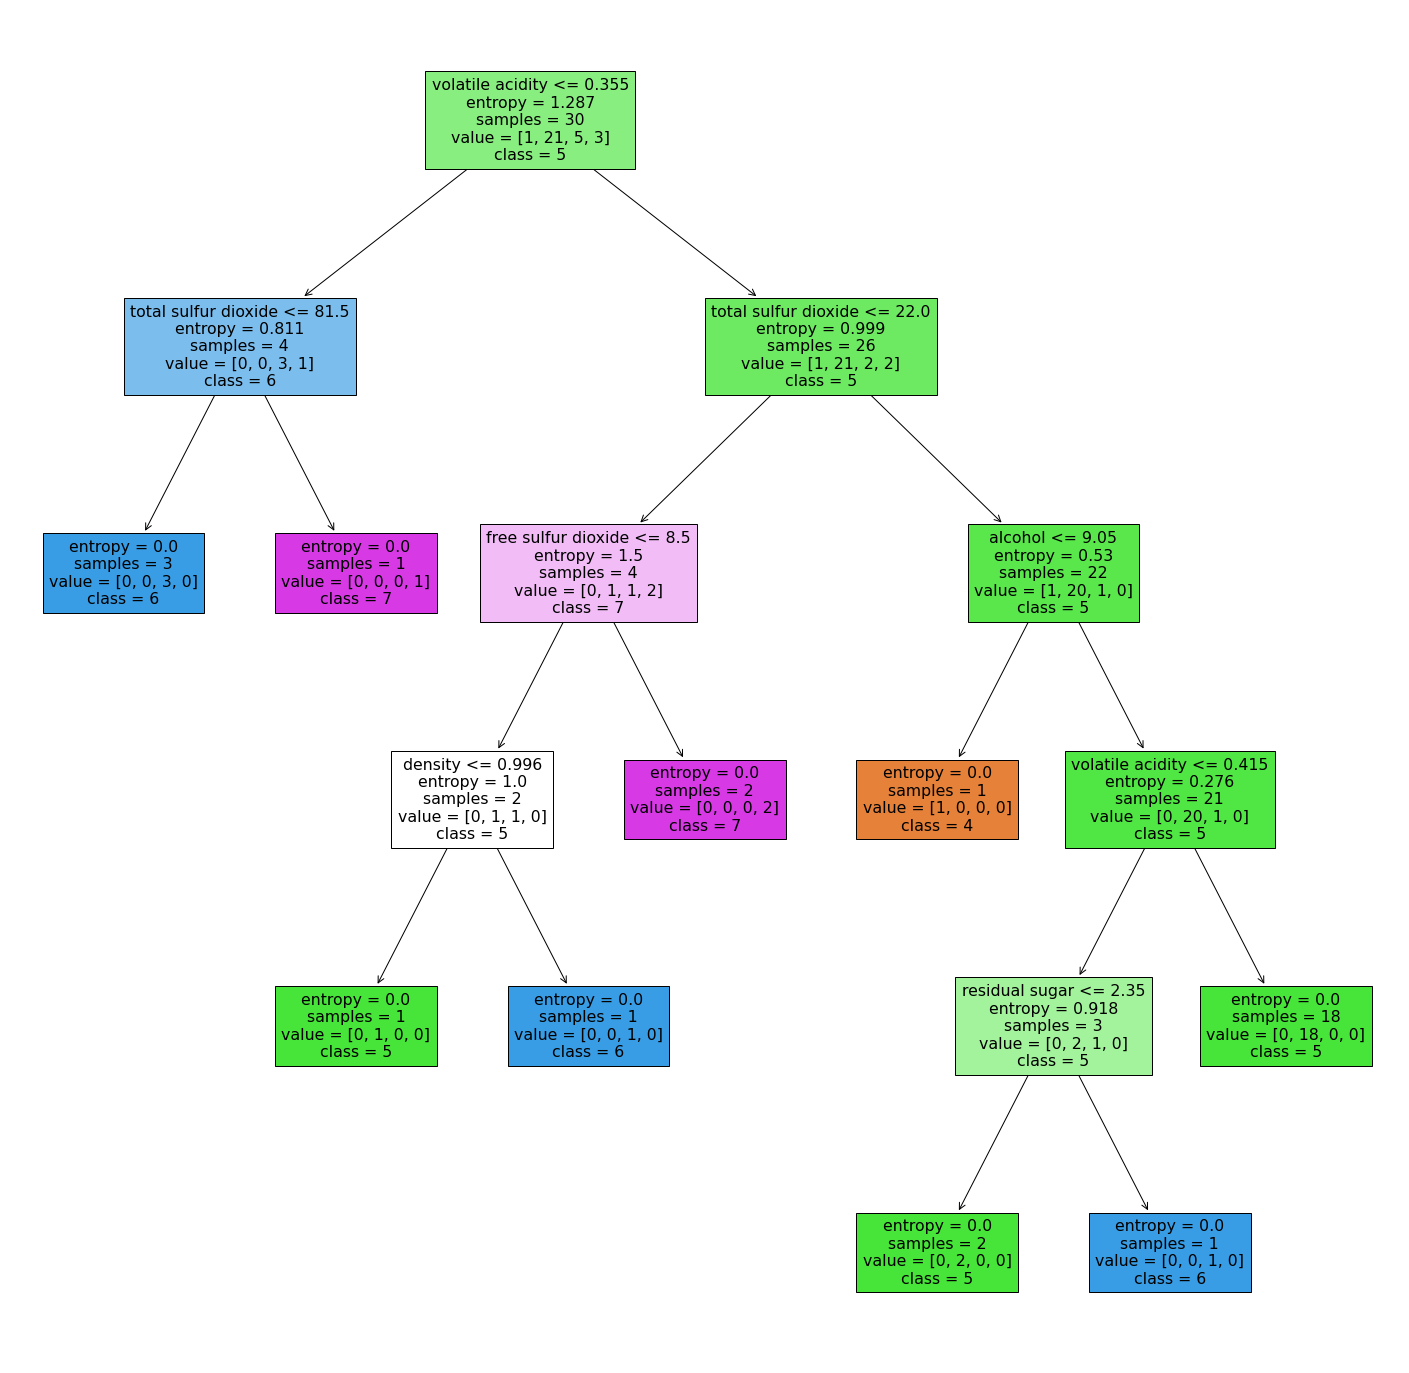

In [27]:
# Visualizing..

plt.figure(figsize=(25, 25))
tree.plot_tree(mod_dt1, filled=True, class_names=[str(i) for i in set(y1)],
              feature_names=x1.columns)

# saving the decision tree as img
plt.savefig('decision_tree_entropy')

In [28]:
x1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [29]:
print(x1['volatile acidity'].median())
print(x1['volatile acidity'].mean())

## As we can see threshold the decision tree is trying to use to divide the branches is neither
# the median nor mean

## in the live class sir told that there's some custom mechanism built in each algorithm to 
# compute the thresholds.

0.58
0.5373333333333333


In [30]:
mod_dt1.score(x1, y1)

## shamelessly overfitted..

1.0

In [31]:
mod_dt1.score(x_test, y_test)

0.4375

In [32]:
mod_dt1.score(x1_test, y1_test)

0.4375

## It's better to discard the further branches from a certain step in a decision tree if the `concrete decision` can be made from that ceratin step itself consequently reducing the complexity and not to spend computational power unnecessarily.
### Here comes the concept of `pre-pruning` and `post-pruning`

In [33]:
# Compute the pruning path during Minimal Cost-Complexity Pruning.
path = mod_dt1.cost_complexity_pruning_path(x1, y1)
path

## kind of `thresh probab` to discard a certain branch if its cost complexity is higher than the 
# `thresh`

{'ccp_alphas': array([0.        , 0.06666667, 0.09182958, 0.10150722, 0.10817042,
        0.13333333, 0.19562766, 0.27679444, 0.31285482]),
 'impurities': array([0.        , 0.06666667, 0.15849625, 0.26000347, 0.36817388,
        0.50150722, 0.69713487, 0.97392931, 1.28678413])}

### ccp_alphas: 

**Complexity parameter used for `Minimal Cost-Complexity Pruning`. The
subtree with the largest cost complexity that is smaller than
``ccp_alpha`` will be chosen. By default, no pruning is performed.**

- ### `pre-pruning`

In [34]:
alphas = path['ccp_alphas']
alphas

array([0.        , 0.06666667, 0.09182958, 0.10150722, 0.10817042,
       0.13333333, 0.19562766, 0.27679444, 0.31285482])

### building model for each ccp_alpha:

In [35]:
models = []
for ccp in alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp)
    model.fit(x1, y1)
    models.append(model)

In [36]:
models

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.06666666666666667),
 DecisionTreeClassifier(ccp_alpha=0.09182958340544896),
 DecisionTreeClassifier(ccp_alpha=0.10150721594810842),
 DecisionTreeClassifier(ccp_alpha=0.10817041659455104),
 DecisionTreeClassifier(ccp_alpha=0.13333333333333336),
 DecisionTreeClassifier(ccp_alpha=0.1956276577222191),
 DecisionTreeClassifier(ccp_alpha=0.27679443603470466),
 DecisionTreeClassifier(ccp_alpha=0.3128548240716781)]

In [37]:
train_scores = [i.score(x1, y1) for i in models]
train_scores

[1.0, 0.8333333333333334, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7, 0.7]

In [38]:
test_scores = [i.score(x_test, y_test) for i in models]
test_scores

[0.34375,
 0.4125,
 0.4125,
 0.446875,
 0.446875,
 0.43125,
 0.43125,
 0.43125,
 0.43125]

## Why do `decision trees` overfit so much?

**Decision trees are prone to overfitting, especially when a tree is particularly deep. This is due to the amount of specificity we look at leading to smaller sample of events that meet the previous assumptions. This small sample could lead to unsound conclusions.**

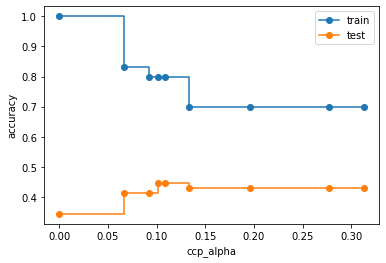

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")

ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores, marker='o', label='test', drawstyle='steps-post')

ax.legend()
plt.show()

In [40]:
### Manual Hyperparameter tuning: 

In [41]:
### let's check the same for substantail amount of datset (i.e for our foremost model `mod`)

path = mod.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']

models = []
for ccp in alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp)
    model.fit(x_train, y_train)
    models.append(model)

models

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0006701664246621245),
 DecisionTreeClassifier(ccp_alpha=0.0007107825716113442),
 DecisionTreeClassifier(ccp_alpha=0.0007167057597081053),
 DecisionTreeClassifier(ccp_alpha=0.0007217176880976721),
 DecisionTreeClassifier(ccp_alpha=0.0007217176880976721),
 DecisionTreeClassifier(ccp_alpha=0.0007260136267173017),
 DecisionTreeClassifier(ccp_alpha=0.0007260136267173017),
 DecisionTreeClassifier(ccp_alpha=0.0007260136267173017),
 DecisionTreeClassifier(ccp_alpha=0.0007285521359016277),
 DecisionTreeClassifier(ccp_alpha=0.0007297367735209802),
 DecisionTreeClassifier(ccp_alpha=0.000744629360735694),
 DecisionTreeClassifier(ccp_alpha=0.0007505863956215791),
 DecisionTreeClassifier(ccp_alpha=0.0007539372277448899),
 DecisionTreeClassifier(ccp_alpha=0.0007574276778733386),
 DecisionTreeClassifier(ccp_alpha=0.000758864922043876),
 DecisionTreeClassifier(ccp_alpha=0.0007627910524609549),
 DecisionTreeClassifier(ccp_alpha=0.00078186082

In [42]:
train_scores = [i.score(x_train, y_train) for i in models]
train_scores

[1.0,
 0.9992181391712275,
 0.9984362783424551,
 0.9976544175136826,
 0.9960906958561376,
 0.9960906958561376,
 0.9937451133698202,
 0.9937451133698202,
 0.9937451133698202,
 0.9921813917122753,
 0.9913995308835027,
 0.9906176700547302,
 0.9898358092259578,
 0.9890539483971853,
 0.9882720875684128,
 0.9874902267396404,
 0.9867083659108679,
 0.9679437060203284,
 0.9695074276778733,
 0.9687255668491008,
 0.9695074276778733,
 0.9695074276778733,
 0.9702892885066459,
 0.9687255668491008,
 0.9695074276778733,
 0.9702892885066459,
 0.9687255668491008,
 0.9695074276778733,
 0.9695074276778733,
 0.9687255668491008,
 0.9695074276778733,
 0.9702892885066459,
 0.9702892885066459,
 0.9695074276778733,
 0.9679437060203284,
 0.9687255668491008,
 0.9695074276778733,
 0.9671618451915559,
 0.9640344018764659,
 0.9640344018764659,
 0.9609069585613761,
 0.9632525410476935,
 0.9601250977326036,
 0.9491790461297889,
 0.9507427677873339,
 0.9499609069585614,
 0.9491790461297889,
 0.9507427677873339,
 0.9491

In [43]:
test_scores = [i.score(x_test, y_test) for i in models]
test_scores

[0.628125,
 0.646875,
 0.6375,
 0.646875,
 0.63125,
 0.61875,
 0.63125,
 0.634375,
 0.634375,
 0.640625,
 0.628125,
 0.621875,
 0.634375,
 0.6375,
 0.625,
 0.6375,
 0.634375,
 0.621875,
 0.625,
 0.609375,
 0.61875,
 0.61875,
 0.6125,
 0.6125,
 0.615625,
 0.625,
 0.609375,
 0.60625,
 0.6125,
 0.621875,
 0.621875,
 0.625,
 0.615625,
 0.625,
 0.625,
 0.61875,
 0.621875,
 0.61875,
 0.61875,
 0.615625,
 0.621875,
 0.60625,
 0.6125,
 0.609375,
 0.603125,
 0.603125,
 0.61875,
 0.596875,
 0.625,
 0.6125,
 0.6125,
 0.603125,
 0.6125,
 0.61875,
 0.6125,
 0.61875,
 0.60625,
 0.615625,
 0.603125,
 0.6,
 0.590625,
 0.61875,
 0.60625,
 0.6125,
 0.603125,
 0.609375,
 0.6125,
 0.6125,
 0.615625,
 0.603125,
 0.603125,
 0.60625,
 0.6,
 0.621875,
 0.60625,
 0.59375,
 0.60625,
 0.596875,
 0.60625,
 0.60625,
 0.6,
 0.603125,
 0.6125,
 0.609375,
 0.6,
 0.60625,
 0.609375,
 0.59375,
 0.6,
 0.596875,
 0.60625,
 0.603125,
 0.6,
 0.596875,
 0.60625,
 0.60625,
 0.60625,
 0.59375,
 0.603125,
 0.596875,
 0.6,
 0.6

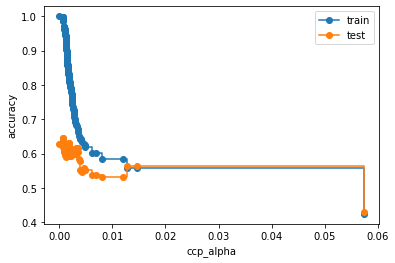

In [44]:
# let's visualize..

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")

ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores, marker='o', label='test', drawstyle='steps-post')

ax.legend()
plt.show()

## We can very well deal with the less accuracy whatsoever but the main  idea is to have a `robust model` i.e. to reduce the difference between `test accuracy` and `train accuracy` as much as possible.

### The reason for all this being so apparent that I could almost laugh i.e. if it is for the smaller dataset our model won't be able to generalize well.

### Possible solutions if my model is being overfitted:

- ### Increase the dataset size so that it would be able to generalize well.
- ### Hyperparameter tuning using cost_complexity_pruning.

In [45]:
## Let's now build the model with suitable `ccp_alpha` val..
# using alpha = 0.015 as interpreted from the above graph

tree_mod = DecisionTreeClassifier(ccp_alpha=0.015)
tree_mod.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015)

In [46]:
print(tree_mod.score(x_train, y_train))
print(tree_mod.score(x_test, y_test))

# hence, we successed in removing the `overfitting`

0.5598123534010946
0.565625


[Text(0.5, 0.75, 'X[10] <= 10.25\ngini = 0.641\nsamples = 1279\nvalue = [9, 43, 543, 516, 153, 15]'),
 Text(0.25, 0.25, 'gini = 0.528\nsamples = 688\nvalue = [6, 25, 418, 218, 20, 1]'),
 Text(0.75, 0.25, 'gini = 0.649\nsamples = 591\nvalue = [3, 18, 125, 298, 133, 14]')]

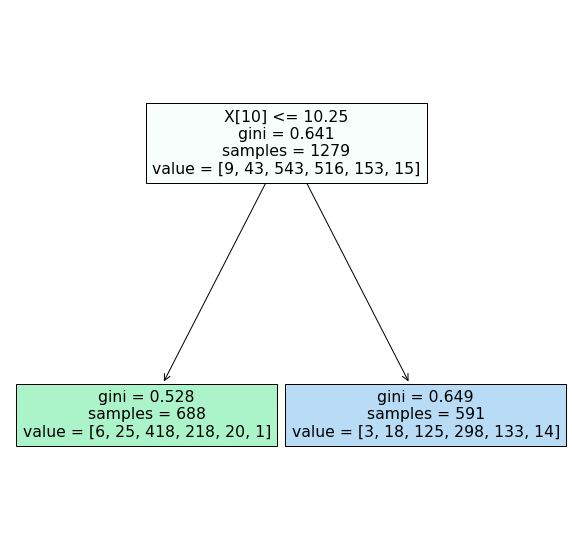

In [47]:
plt.figure(figsize=(10, 10))
tree.plot_tree(tree_mod, filled=True)

In [48]:
### If we keep doing this way manually like we've been doing up till now, then we'll have to 
# create 100s of models because ccp alpha is not the only hyperparameter to be tuned; there still 
# are many hyperparameteres which also require tuning and that too simutaneously.

# --> So for that we have GridSearchCV and RandomSearchCV

- ### GridSearchCV

In [49]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [50]:
grid_param = {"criterion": ['gini', 'entropy'],
             "splitter": ['best', 'random'],
             "max_depth": range(2, 40, 1),
             "min_samples_split": range(2, 10, 1),
             "min_samples_leaf": range(1, 10, 1)
             }

In [51]:
# this's gonna be compute heavy operation
grid_cv = GridSearchCV(estimator=tree_mod, param_grid=grid_param, cv=5, n_jobs=-1)
grid_cv
# cv: 5 horizontal splits outta which 1 is for testing.
# n_jobs: no. of cores of processore to be executed. -1 for to involve all.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.015), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [52]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.015), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [53]:
### Now, we are to find the best possible params
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 36,
 'min_samples_leaf': 9,
 'min_samples_split': 4,
 'splitter': 'random'}

In [54]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=4, 
                                    min_samples_split=9, splitter='random', ccp_alpha=0.015)
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy', max_depth=31,
                       min_samples_leaf=4, min_samples_split=9,
                       splitter='random')

In [55]:
print("training_score: ", best_model.score(x_train, y_train)*100)
print("test_score: ", best_model.score(x_test, y_test)*100)

### --> Demonstrates the fact that even after the so-called `hyperparameter tuning`, there ain't no 
# gurantee that we won't get any overfitted model.

training_score:  56.5285379202502
test_score:  54.37499999999999


### Thus `hyperparameter tuning` isn't a univeral resolution for an over-fitted model.

- ### RandomizedSearchCV

In [59]:
# RandimizedSearchCV: Randomized search on hyper parameters.

random_params = {"criterion": ['gini', 'entropy'],
             "splitter": ['best', 'random'],
             "max_depth": range(2, 40, 1),
             "min_samples_split": range(2, 10, 1),
             "min_samples_leaf": range(1, 10, 1)
             }

random_cv = RandomizedSearchCV(tree_mod, random_params, cv=5, n_jobs=-1)
random_cv

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.015),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']})

In [60]:
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.015),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']})

In [61]:
random_cv.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_depth': 17,
 'criterion': 'entropy'}

In [63]:
r_mod = DecisionTreeClassifier(ccp_alpha=0.015, criterion= 'entropy',
                                        max_depth= 17,
                                        min_samples_leaf=1,
                                        min_samples_split=9,
                                        splitter='random')
r_mod

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy', max_depth=17,
                       min_samples_split=9, splitter='random')

In [64]:
r_mod.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy', max_depth=17,
                       min_samples_split=9, splitter='random')

In [65]:
print("training score:", r_mod.score(x_train, y_train))
print("test scores:", r_mod.score(x_test, y_test))

training score: 0.5645035183737295
test scores: 0.5625


In [66]:
pred = r_mod.predict(x_train)
pred

array([5, 6, 6, ..., 6, 5, 6], dtype=int64)

In [67]:
confusion_matrix(y_train, pred)

array([[  0,   0,   3,   6,   0,   0],
       [  0,   0,  21,  22,   0,   0],
       [  0,   0, 368, 173,   2,   0],
       [  0,   0, 167, 299,  50,   0],
       [  0,   0,  11,  87,  55,   0],
       [  0,   0,   1,   7,   7,   0]], dtype=int64)